**Step 1: adding libraries**

In [ ]:
# importing needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HR_comma_sep.csv to HR_comma_sep.csv


In [ ]:
import io
data = io.BytesIO(uploaded['HR_comma_sep.csv'])

**Step 2: reading dataset**

dataset from: [open in kaggle](https://www.kaggle.com/datasets/giripujar/hr-a)

In [ ]:
# read dataset
df = pd.DataFrame(pd.read_csv('HR_comma_sep.csv'))

**Step 3: getting to know our data**

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**Step 4: visualizing our data**






note: as we saw, salary data type is string so we need to convert it to integer for this part and we do that by label encoder. however, later, we will try one hot encoding.

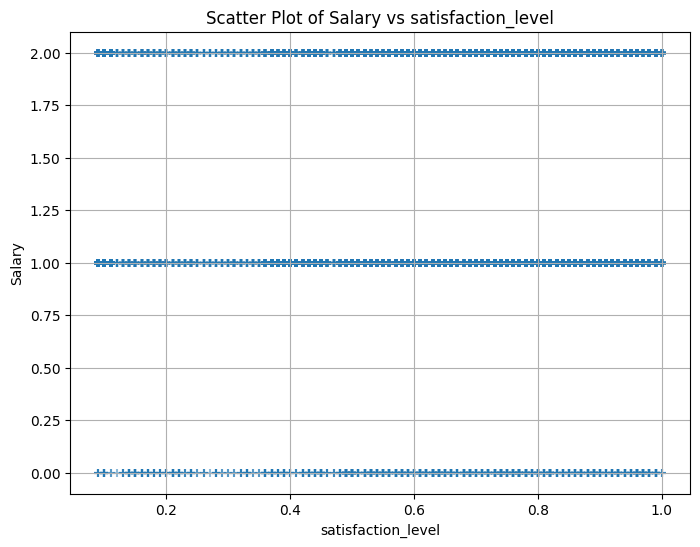

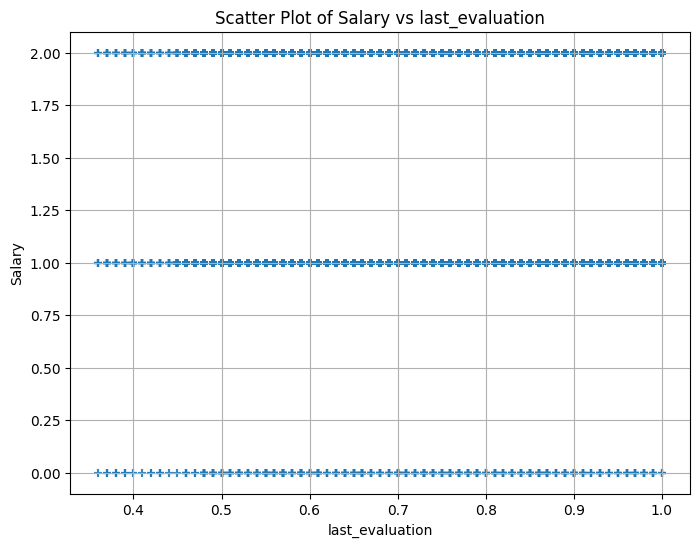

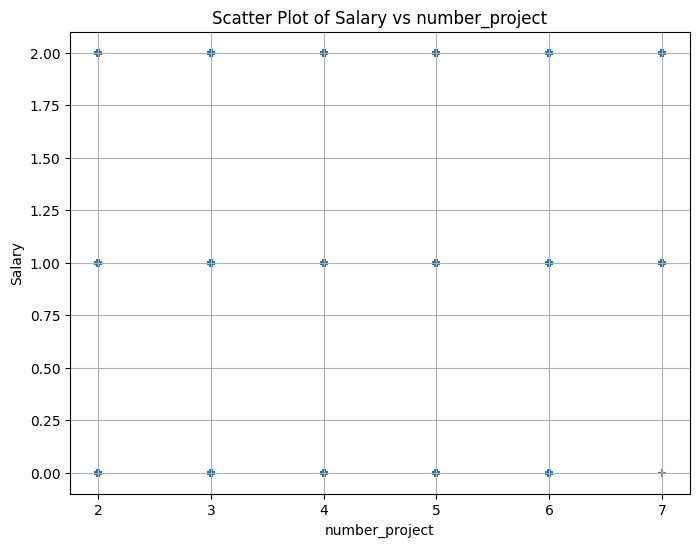

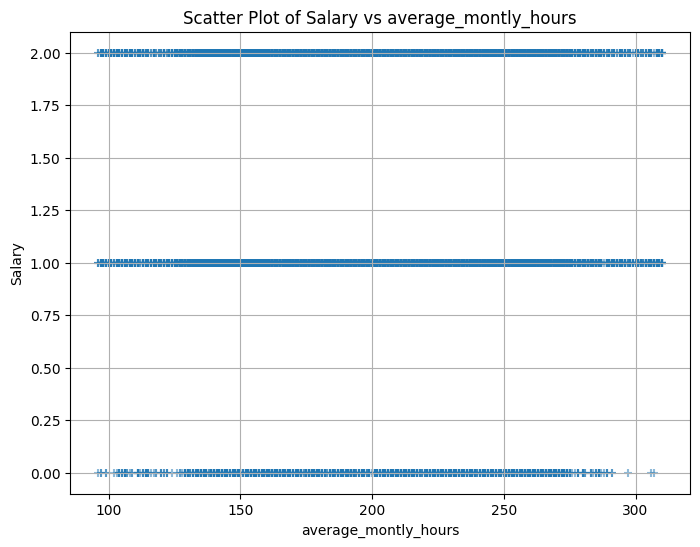

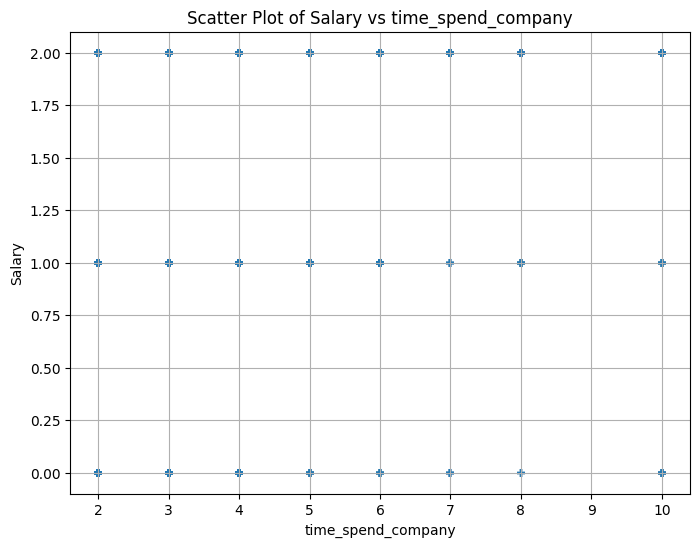

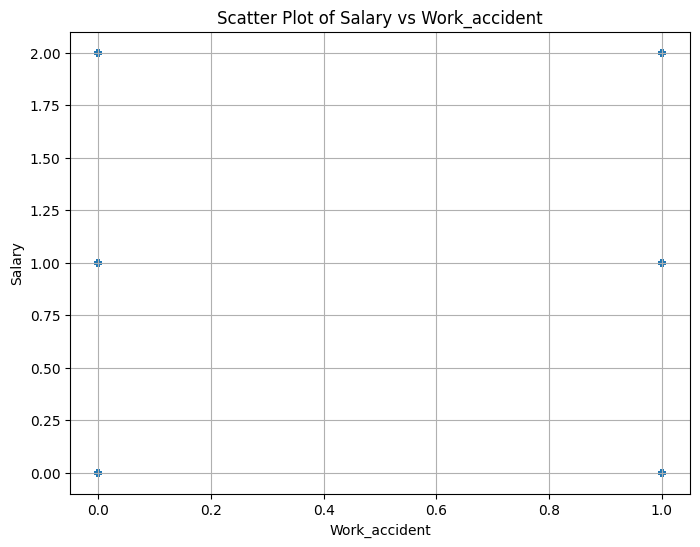

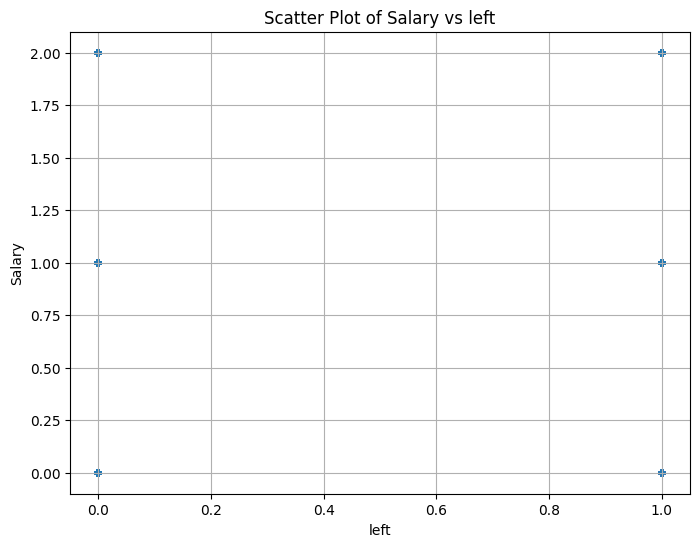

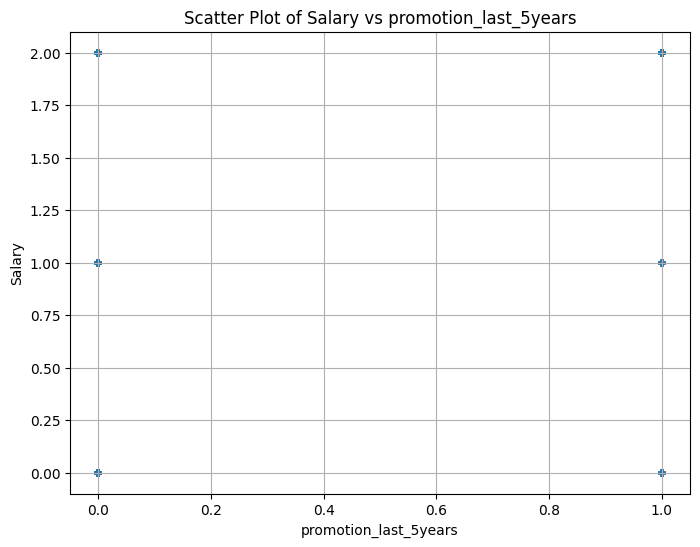

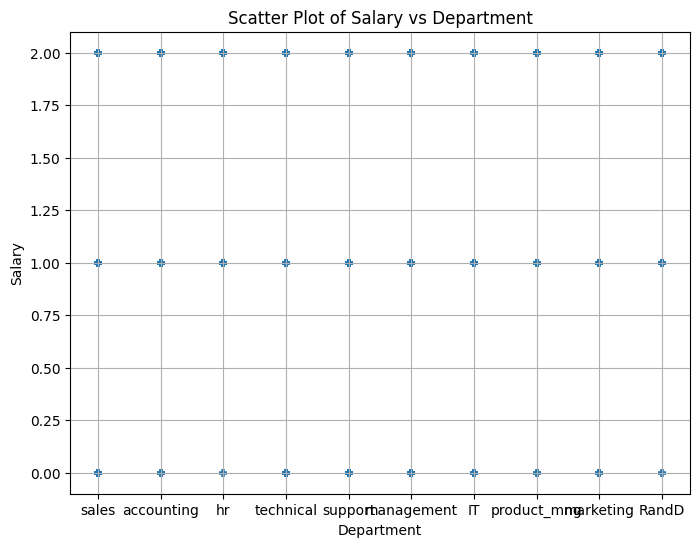

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert 'salary' column into numerical format using label encoding
label_encoder = LabelEncoder()
df['salary_encoded'] = label_encoder.fit_transform(df['salary'])

# Now we can use 'salary_encoded' as our target variable
target = df['salary_encoded']

# Proceed with the scatter plot code as before
for col in df.columns:
    if col != 'salary' and col != 'salary_encoded':
        columns = df[col]
        plt.figure(figsize=(8,6))
        plt.scatter(columns, target, marker='+', alpha=0.5)
        plt.title(f'Scatter Plot of Salary vs {col}')
        plt.xlabel(col)
        plt.ylabel('Salary')
        plt.grid(True)
        plt.show()


**Step 5: grouping and visualizing**

to see the differences between poeple who have left the company and people who retained.

In [ ]:
leftCompany = df[df.left==1]
leftCompany.shape

(3571, 11)

In [ ]:
retained = df[df.left==0]
retained.shape

(11428, 11)

<Axes: xlabel='salary'>

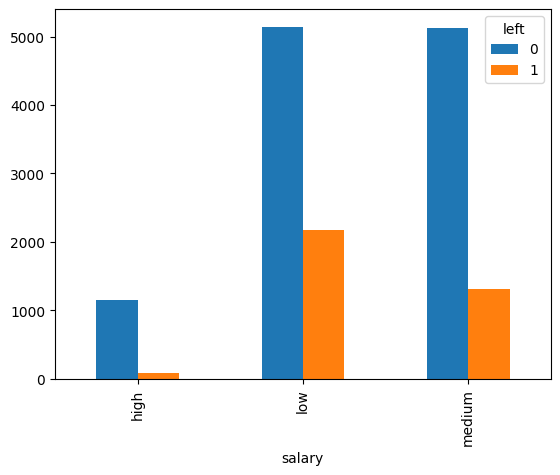

In [ ]:
df.groupby('left')
pd.crosstab(df.salary,df.left).plot(kind='bar')


people with less salary are leaving the company.

<Axes: xlabel='left'>

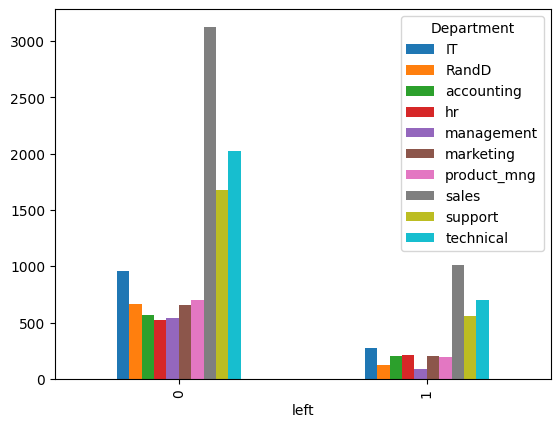

In [ ]:
df.groupby('Department')
pd.crosstab(df.left,df.Department).plot(kind='bar')

as we can see, department really does not affect whether people stay or leave. so we are going to ignore this feature.
example: the highest rate of retrained and stayed people in company, belongs to sale department.

<Axes: xlabel='left'>

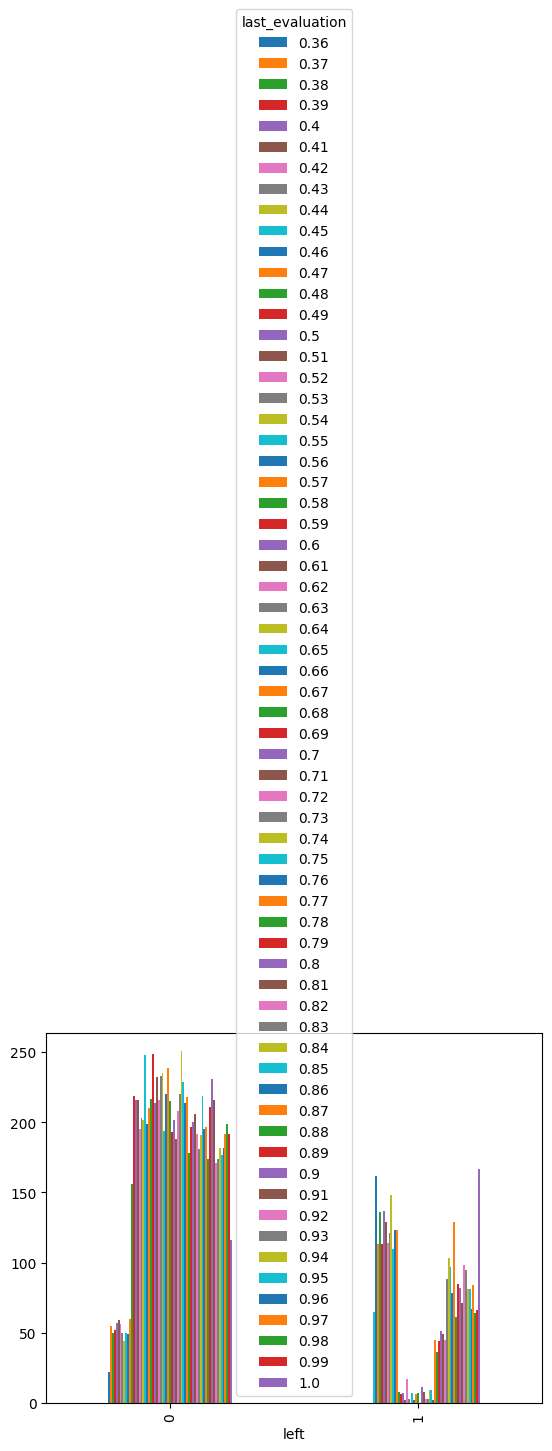

In [ ]:
df.groupby('last_evaluation')
pd.crosstab(df.left, df.last_evaluation).plot(kind='bar')

<Axes: xlabel='left'>

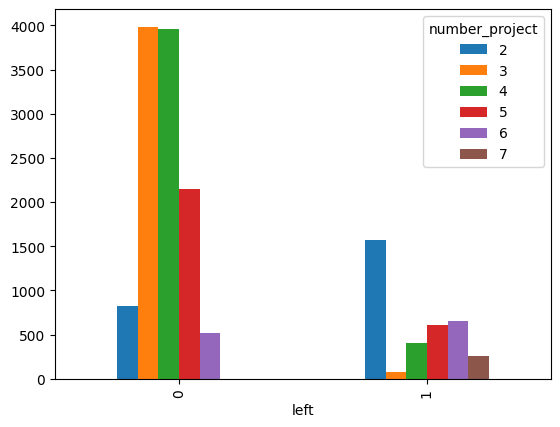

In [ ]:
df.groupby('number_project')
pd.crosstab(df.left, df.number_project).plot(kind='bar')

Step 6.5: visualizing all of the features, compared to 'left' feature

<Figure size 800x600 with 0 Axes>

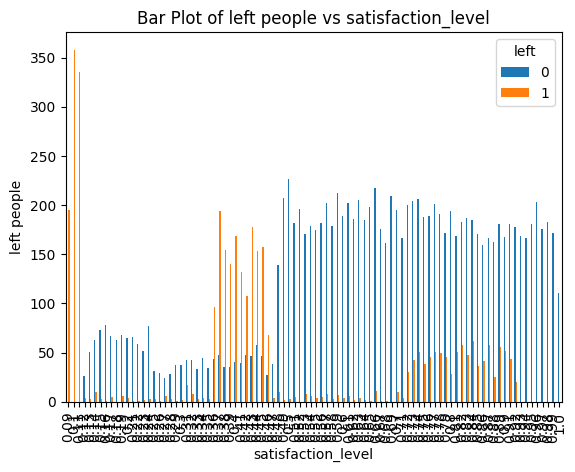

<Figure size 800x600 with 0 Axes>

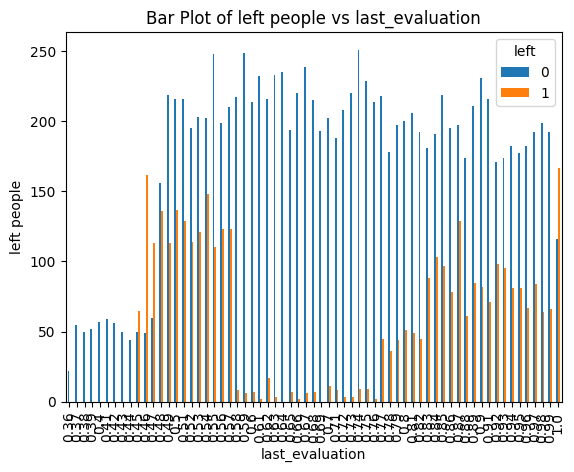

<Figure size 800x600 with 0 Axes>

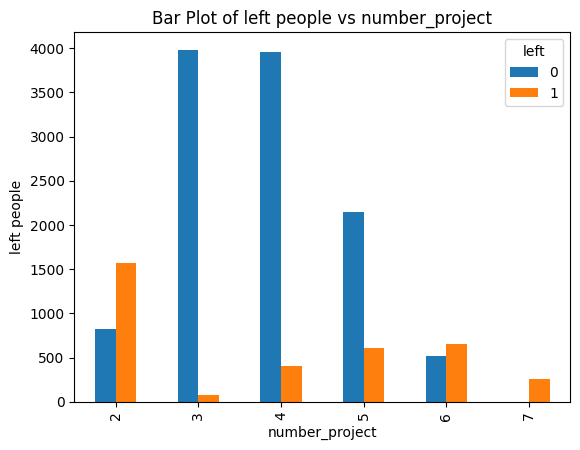

<Figure size 800x600 with 0 Axes>

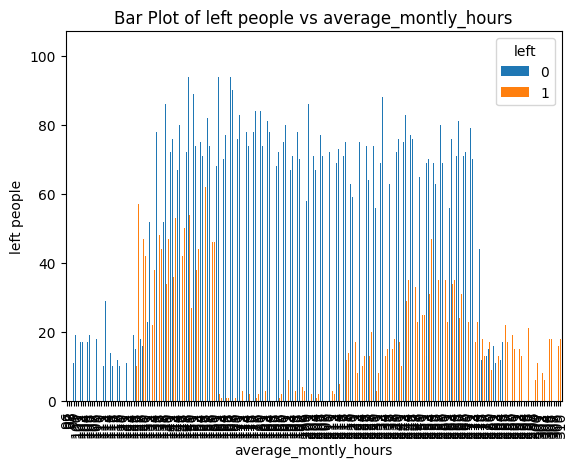

<Figure size 800x600 with 0 Axes>

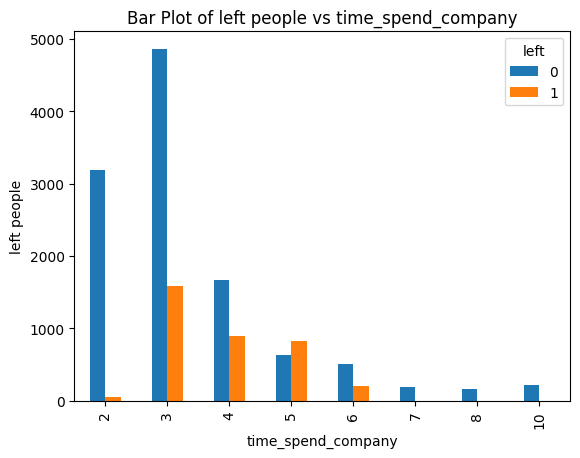

<Figure size 800x600 with 0 Axes>

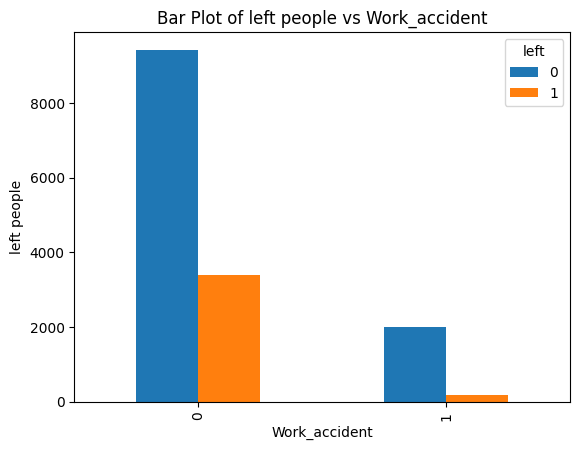

<Figure size 800x600 with 0 Axes>

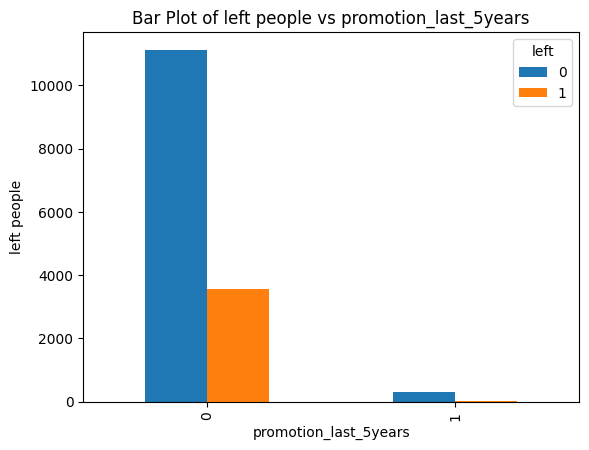

<Figure size 800x600 with 0 Axes>

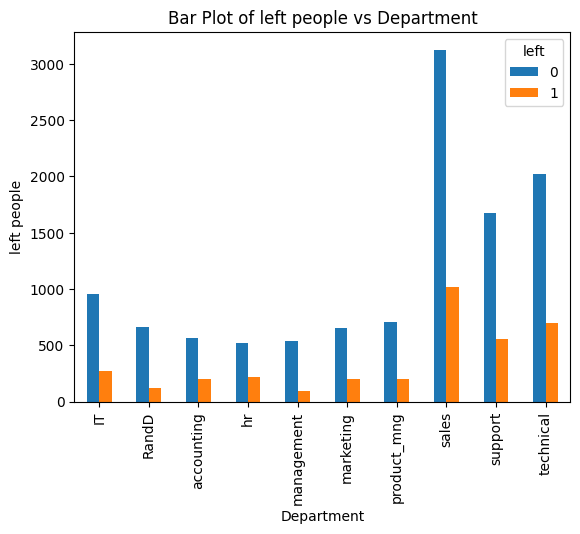

<Figure size 800x600 with 0 Axes>

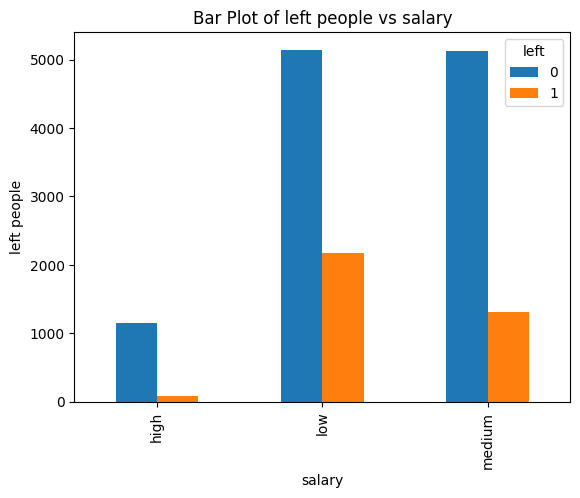

<Figure size 800x600 with 0 Axes>

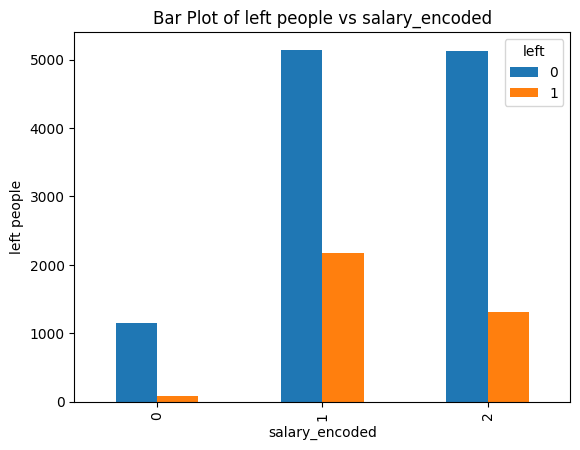

In [80]:
target_left = df['left']

# Proceed with the scatter plot code as before
for col in df.columns:
    if col != 'left':
        columns = df[col]
        df.groupby(col)
        plt.figure(figsize=(8,6))
        pd.crosstab(columns, target_left).plot(kind='bar')
        plt.title(f'Bar Plot of left people vs {col}')
        plt.xlabel(col)
        plt.ylabel('left people')
        plt.show()


here, I'm showing the same results in two kind of bar plots to help you to understand better. you can use the one you are more comfortable to work with!

<Figure size 800x600 with 0 Axes>

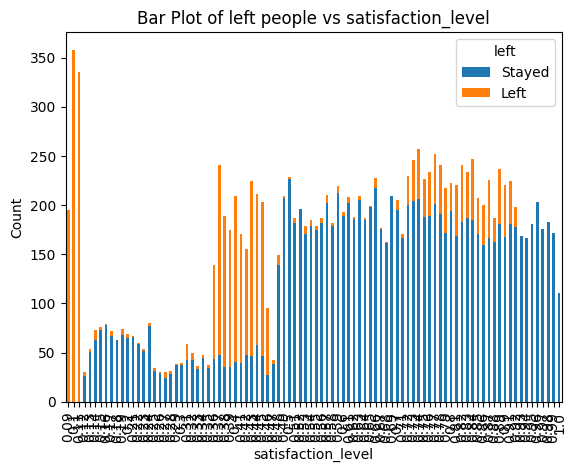

<Figure size 800x600 with 0 Axes>

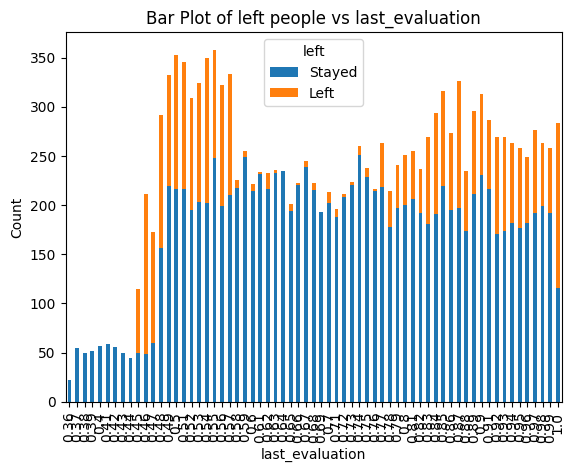

<Figure size 800x600 with 0 Axes>

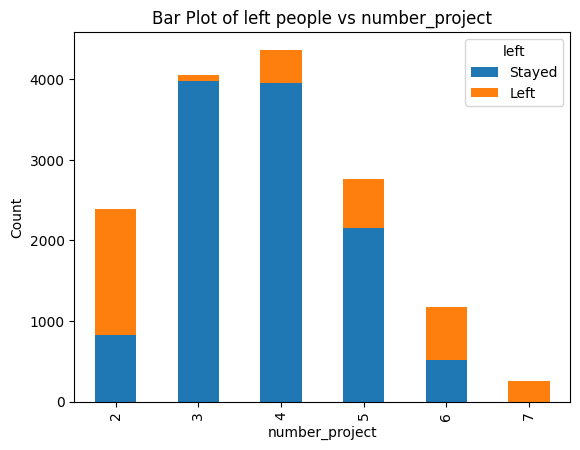

<Figure size 800x600 with 0 Axes>

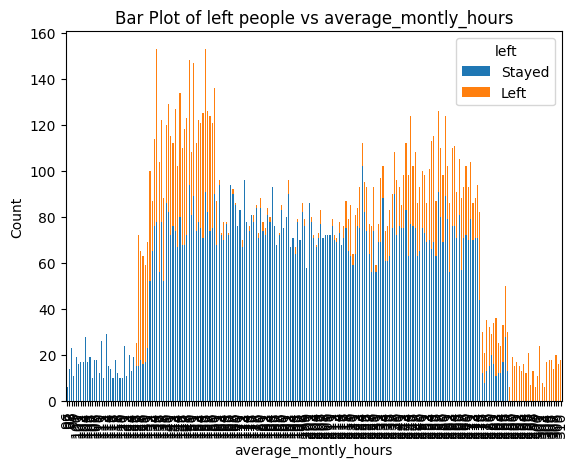

<Figure size 800x600 with 0 Axes>

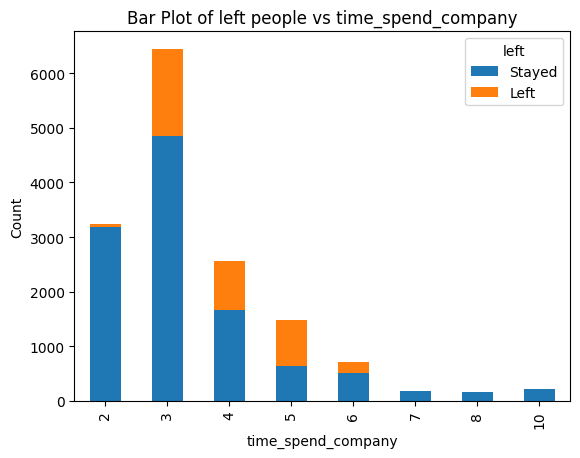

<Figure size 800x600 with 0 Axes>

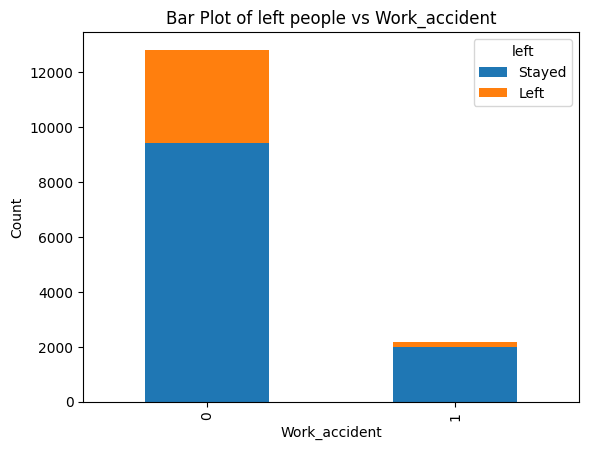

<Figure size 800x600 with 0 Axes>

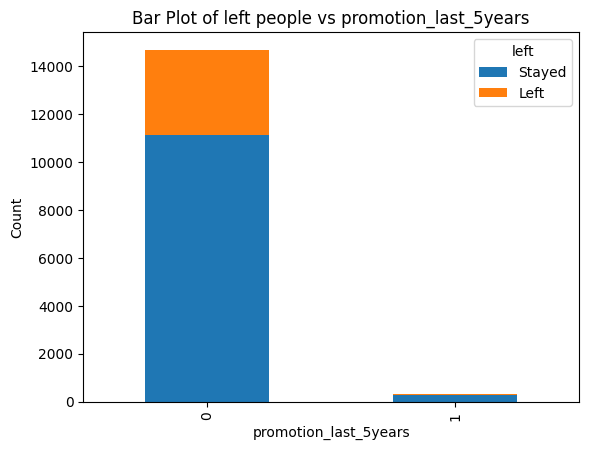

<Figure size 800x600 with 0 Axes>

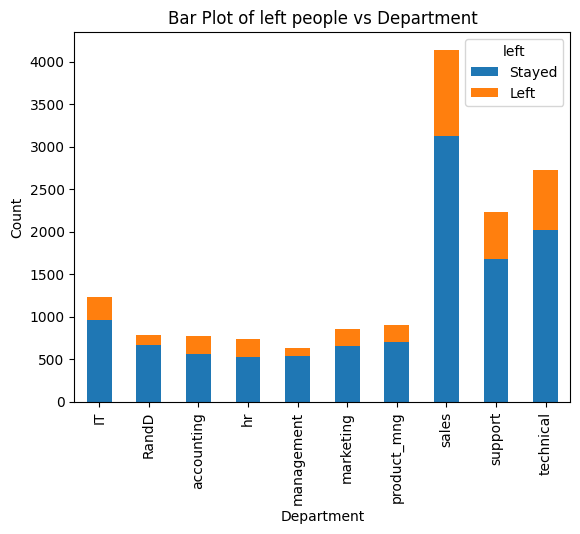

<Figure size 800x600 with 0 Axes>

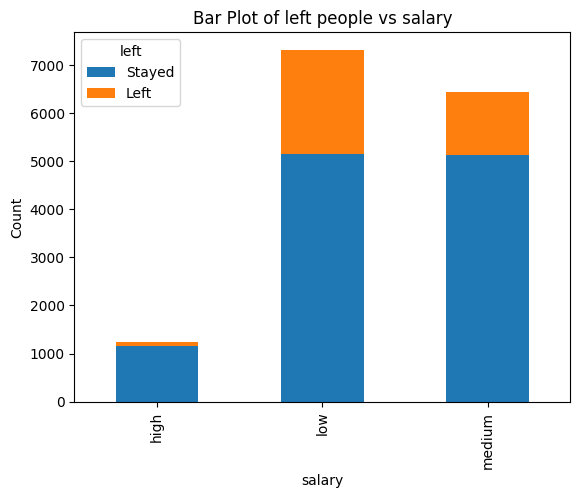

<Figure size 800x600 with 0 Axes>

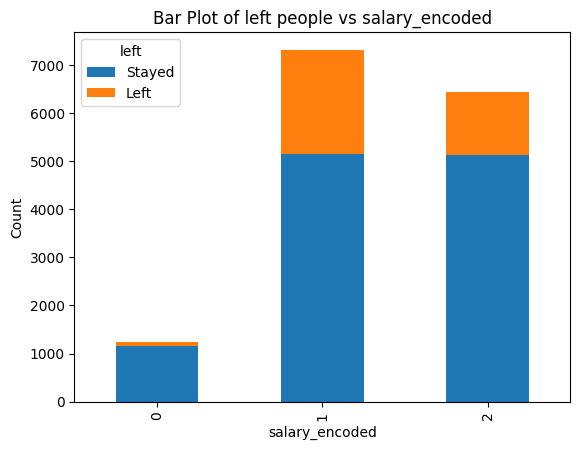

In [33]:
target_left = df['left']

# Proceed with the scatter plot code as before
for col in df.columns:
    if col != 'left':
        plt.figure(figsize=(8,6))
        # Group by the current column and calculate the count of 'left' values for each group
        group_counts = df.groupby(col)['left'].value_counts().unstack()
        group_counts.plot(kind='bar', stacked=True)
        plt.title(f'Bar Plot of left people vs {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.legend(title='left', labels=['Stayed', 'Left'])
        plt.show()


from these plots we understand there are 4 most important feature which affects if people in this company are going to stay or not.

1- salary

2- average monthly hour

3- satisfaction level

4- last evaluation

**Step 7: choosing our most usable features**

choosing features which are having more impact on the choice of an employee to retain or leave.

In [38]:
# makind a sub dataframe which only consists some of our features, named df2

df2 = df[['average_montly_hours','last_evaluation','satisfaction_level','salary']]
df2.head()

,average_montly_hours,last_evaluation,satisfaction_level,salary
0,157,0.53,0.38,low
1,262,0.86,0.80,medium
2,272,0.88,0.11,medium
3,223,0.87,0.72,low
4,159,0.52,0.37,low


**Step 8: Creating dummy variables**


this time, we will convert salary feature to integers using one hot encoding.

In [67]:
dummyVariables = pd.get_dummies(df2.salary,prefix='salary')

In [68]:
# combinig dummyVariables with the dataframe we had by choosing some of our features.

dfWithDummyVars = pd.concat([df2,dummyVariables],axis='columns')

In [69]:
# dropping the original salary column and converting the datatype to integer.

dfWithDummyVars = dfWithDummyVars.drop('salary',axis=1).astype(int)
dfWithDummyVars.head()

,average_montly_hours,last_evaluation,satisfaction_level,salary_high,salary_low,salary_medium
0,157,0,0,0,1,0
1,262,0,0,0,0,1
2,272,0,0,0,0,1
3,223,0,0,0,1,0
4,159,0,0,0,1,0


**Step 9: creating our dependent and independent variables**

In [70]:
X = dfWithDummyVars
y = df.left

**Step 10: train test split**

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42, test_size = 0.3)

**Step 11: selecting and training the model**

In [73]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train,y_train)

model.predict(X_test)


array([0, 0, 0, ..., 0, 0, 0])

**Step 12: calculating score of our model to see the accuracy**

In [77]:
model.score(X_test,y_test)

0.7684444444444445

we have got a good score! now way to go to next excercies